## Data Validation

In [4]:
# Import libraries
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Read in dataset
properties = pd.read_csv('datasets/Sao_Paulo.csv')

In [6]:
# Check original data shape, types and missing entries
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [7]:
# Calculate summary of missing entries
missing_addresses = 10008 - 6574
missing_wards = 10008 - 9996
missing_entries = missing_addresses + missing_wards

print('Dataset length:', len(properties))
print('Number of columns:', len(properties.columns))
print('Missing addresses (Rua):', missing_addresses)
print('Missing wards (Bairro):', missing_wards)
print('Total number of missing entries:', missing_entries)

Dataset length: 10008
Number of columns: 8
Missing addresses (Rua): 3434
Missing wards (Bairro): 12
Total number of missing entries: 3446


### Validation of column 'Rua'

In [8]:
# Keep entries with non-null addresses since these are essential for housing price analysis, and also keys for identifying other missing data. 
prop_addresses = properties[properties['Rua'].notna()]

# Read dataset head
prop_addresses.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000
5,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000


In [9]:
# Create function to remove house numbers to prevent home identification and preserve private information
def cleanup_address_number(address):
    return re.sub(r'[0-9]+', '', address).replace(',', '').strip()
     
# Apply string formatting function to the column 'Rua'
prop_addresses['Rua'] = prop_addresses['Rua'].apply(cleanup_address_number)

# Validate transformation
prop_addresses.head()

/tmp/ipykernel_42162/892787468.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prop_addresses['Rua'] = prop_addresses['Rua'].apply(cleanup_address_number)


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,Avenida Itacira,Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,Rua Aurelia Perez Alvarez,Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
4,Rua Tobias Barreto,Mooca,São Paulo,100,3,2,2,R$ 540.000
5,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000


### Validation of column 'Bairro'

In [10]:
# Get a list of addresses with null wards
prop_ward_missing = prop_addresses[prop_addresses['Bairro'].isna()]
addresses = prop_ward_missing['Rua'].unique().tolist()
addresses

['Rua Madalena de Morais',
 'Rua Vergueiro',
 'Rua Alvorada do Sul',
 'Rua Professor Eduardo Monteiro',
 'Avenida Comendador Adibo Ares',
 'Rua Santo Eufredo',
 'Rua Professor Lúcio Martins Rodrigues',
 'Rua Pacobá']

In [11]:
# Lookup for properties in the same addresses within the dataset
same_address = prop_addresses[prop_addresses['Rua'].isin(addresses)]\
                             [prop_addresses['Bairro'].notna()]\
                             .sort_values(['Rua', 'Bairro'])
same_address

/tmp/ipykernel_42162/228398945.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  same_address = prop_addresses[prop_addresses['Rua'].isin(addresses)]\


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
343,Avenida Comendador Adibo Ares,Morumbi,São Paulo,686,5,6,5,R$ 3.350.000
744,Avenida Comendador Adibo Ares,Morumbi,São Paulo,772,4,6,8,R$ 4.100.000
862,Avenida Comendador Adibo Ares,Morumbi,São Paulo,450,4,5,6,R$ 1.800.000
892,Avenida Comendador Adibo Ares,Morumbi,São Paulo,455,4,5,6,R$ 1.800.000
4876,Avenida Comendador Adibo Ares,Morumbi,São Paulo,900,3,6,8,R$ 7.700.000
5794,Avenida Comendador Adibo Ares,Morumbi,São Paulo,1000,5,5,4,R$ 3.350.000
5953,Avenida Comendador Adibo Ares,Morumbi,São Paulo,1005,5,5,4,R$ 3.350.000
9527,Avenida Comendador Adibo Ares,Morumbi,São Paulo,1000,5,8,6,R$ 3.350.000
1738,Rua Alvorada do Sul,Jardim Guedala,São Paulo,520,4,5,3,R$ 1.890.000
3174,Rua Alvorada do Sul,Jardim Guedala,São Paulo,496,4,4,3,R$ 14.000\n /Mês


In [12]:
# Create a dictionary of addresses and wards
full_address = dict(zip(same_address['Rua'], same_address['Bairro']))
full_address['Rua Professor Lúcio Martins Rodrigues'] = 'Morumbi'   # Added after Google search

for address, ward in full_address.items():
  print(address, ':', ward)

Avenida Comendador Adibo Ares : Morumbi
Rua Alvorada do Sul : Jardim Guedala
Rua Madalena de Morais : Jardim Leonor
Rua Pacobá : Jardim Panorama
Rua Professor Eduardo Monteiro : Jardim Leonor
Rua Santo Eufredo : Jardim Guedala
Rua Vergueiro : Vila Firmiano Pinto
Rua Professor Lúcio Martins Rodrigues : Morumbi


In [13]:
# Fill in ward missing values based on dictionary of full addresses
prop_addresses['Bairro'] = prop_addresses['Bairro'].fillna(prop_addresses['Rua'].apply(lambda x: full_address.get(x)))

# Input validation
prop_addresses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6574 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     6574 non-null   object
 2   Cidade     6574 non-null   object
 3   Metragem   6574 non-null   int64 
 4   Quartos    6574 non-null   int64 
 5   Banheiros  6574 non-null   int64 
 6   Vagas      6574 non-null   int64 
 7   Valor      6574 non-null   object
dtypes: int64(4), object(4)
memory usage: 720.3+ KB


/tmp/ipykernel_42162/1203612893.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prop_addresses['Bairro'] = prop_addresses['Bairro'].fillna(prop_addresses['Rua'].apply(lambda x: full_address.get(x)))


### Validation of column 'Cidade'

In [14]:
# Validate column 'Cidade'
prop_addresses['Cidade'].value_counts()

São Paulo    6574
Name: Cidade, dtype: int64

### Validation of column 'Metragem'

In [15]:
# Check summary statistics
prop_addresses['Metragem'].describe()

count      6574.000000
mean        456.056891
std        9260.689737
min          10.000000
25%         165.000000
50%         264.000000
75%         425.000000
max      750000.000000
Name: Metragem, dtype: float64

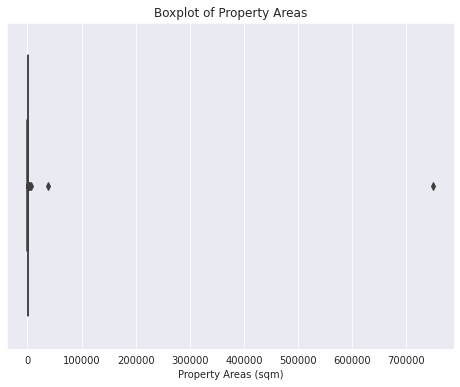

In [16]:
# Boxplot of Property Areas
plt.figure(figsize=(8,6))
sns.set_style('darkgrid')
sns.boxplot(x='Metragem', data=prop_addresses).set(title = 'Boxplot of Property Areas', xlabel='Property Areas (sqm)')
plt.show()

Summary statistics reveal right skewed data with the existence of extreme outliers (values which lie more than 3.0 times the interquartile range above the third quartile), therefore IQR based filtering was adopted to remove them.

In [17]:
# Create a function to remove outliers from continuous data

def continuous_iqr_range_outlier_removal(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    LCL = Q1 - 1.5 * IQR
    print('Lower Limit:', LCL)
    UCL = Q3 + 1.5 * IQR
    print('Upper Limit:', UCL)
    
    outlier_free_list = [x for x in data[col] if ((x >= LCL) & (x <= UCL))]
    filtered_data = data.loc[data[col].isin(outlier_free_list)]

    return filtered_data

Lower Limit: -225.0
Upper Limit: 815.0


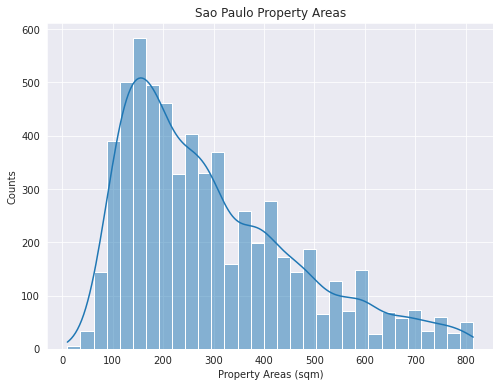

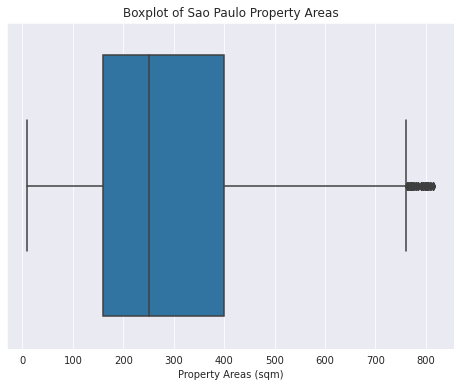

In [18]:
# Apply continuous outlier removal function to the column 'Metragem'
prop_areas = continuous_iqr_range_outlier_removal(prop_addresses, 'Metragem')

# Histogram of Property Areas
plt.figure(figsize=(8,6))
sns.set_style('darkgrid')
sns.histplot(x='Metragem', data=prop_areas, kde=True).set(title = 'Sao Paulo Property Areas', xlabel='Property Areas (sqm)', ylabel='Counts')
plt.show()

# Boxplot of Property Areas
plt.figure(figsize=(8,6))
sns.boxplot(x='Metragem', data=prop_areas).set(title = 'Boxplot of Sao Paulo Property Areas', xlabel='Property Areas (sqm)')
plt.show()

### Validation of column 'Quartos'

In [19]:
# Check summary statistics
prop_areas['Quartos'].describe()

count    6253.00000
mean        3.37438
std         1.02094
min         1.00000
25%         3.00000
50%         3.00000
75%         4.00000
max        16.00000
Name: Quartos, dtype: float64

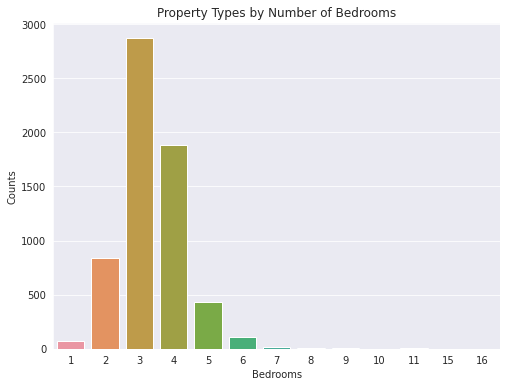

In [20]:
# Countplot of Property Types by Number of Bedrooms
plt.figure(figsize=(8,6))
sns.countplot(x='Quartos', data=prop_areas).set(title = 'Property Types by Number of Bedrooms', xlabel='Bedrooms', ylabel='Counts')
plt.show()

In [21]:
# Create a function to remove outliers from discrete data

def discrete_iqr_range_outlier_removal(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    LCL = Q1 - 1.5 * IQR
    if(type(LCL) != int):
        LCL = LCL - 0.5 
    print('Lower Limit:', LCL)

    UCL = Q3 + 1.5 * IQR
    if (type(UCL) != int):
        UCL = UCL + 0.5
    print('Upper Limit:', UCL)

    outlier_free_list = [x for x in data[col] if ((x >= LCL) & (x <= UCL))]
    filtered_data = data.loc[data[col].isin(outlier_free_list)]

    return filtered_data

Lower Limit: 1.0
Upper Limit: 6.0


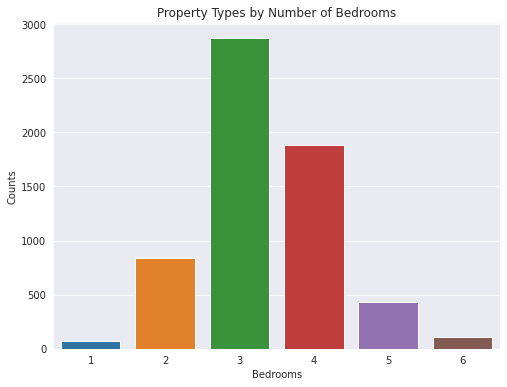

In [22]:
# Apply discrete outlier removal function to the column 'Quartos'
prop_beds = discrete_iqr_range_outlier_removal(prop_areas, 'Quartos')

# Countplot of Property Types by Number of Bedrooms
plt.figure(figsize=(8,6))
sns.countplot(x='Quartos', data=prop_beds).set(title = 'Property Types by Number of Bedrooms', xlabel='Bedrooms', ylabel='Counts')
plt.show()

### Validation of the column 'Banheiros'

In [23]:
# Check summary statistics
prop_beds['Banheiros'].describe()

count    6206.000000
mean        3.618273
std         1.729895
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        12.000000
Name: Banheiros, dtype: float64

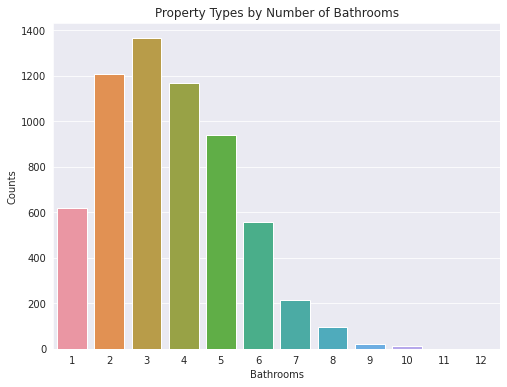

In [24]:
# Countplot of Property Types by Number of Bathrooms
plt.figure(figsize=(8,6))
sns.countplot(x='Banheiros', data=prop_beds).set(title = 'Property Types by Number of Bathrooms', xlabel='Bathrooms', ylabel='Counts')
plt.show()

Lower Limit: -3.0
Upper Limit: 10.0


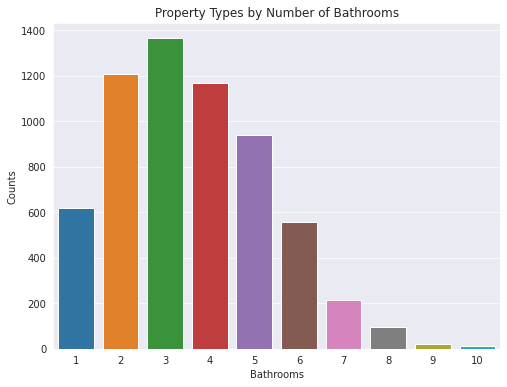

In [25]:
# Apply discrete outlier removal function to the column 'Banheiros'
prop_baths = discrete_iqr_range_outlier_removal(prop_beds, 'Banheiros')

# Countplot of Property Types by Number of Bathrooms
plt.figure(figsize=(8,6))
sns.countplot(x='Banheiros', data=prop_baths).set(title = 'Property Types by Number of Bathrooms', xlabel='Bathrooms', ylabel='Counts')
plt.show()

### Validation of column 'Vagas'

In [26]:
# Validation of column 'Vagas'
prop_baths['Vagas'].describe()

count    6204.000000
mean        3.640232
std         2.291261
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        50.000000
Name: Vagas, dtype: float64

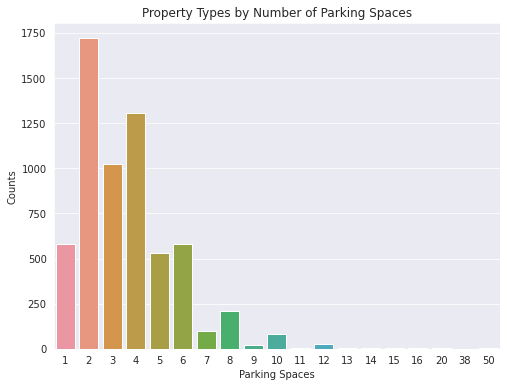

In [27]:
# Countplot of Property Types by Number of Parking Spaces
plt.figure(figsize=(8,6))
sns.countplot(x='Vagas', data=prop_baths).set(title = 'Property Types by Number of Parking Spaces', xlabel='Parking Spaces', ylabel='Counts')
plt.show()

Lower Limit: -3.0
Upper Limit: 10.0


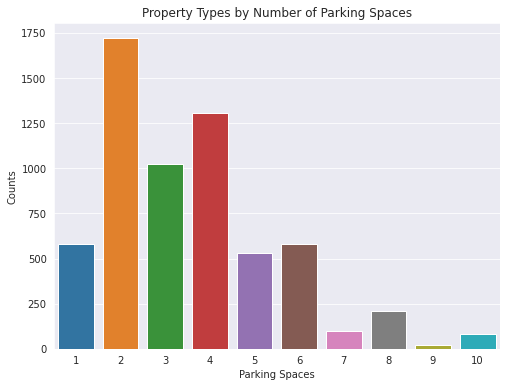

In [28]:
# Apply discrete outlier removal function to the column 'Banheiros'
prop_parking = discrete_iqr_range_outlier_removal(prop_baths, 'Vagas')

# Countplot of Property Types by Number of Parking Spaces
plt.figure(figsize=(8,6))
sns.countplot(x='Vagas', data=prop_parking).set(title = 'Property Types by Number of Parking Spaces', xlabel='Parking Spaces', ylabel='Counts')
plt.show()

### Validation of column 'Valor'

In [29]:
# Read random sample
prop_parking.sample(10, random_state=1)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
8427,Rua Fructuoso Viana,Horto Florestal,São Paulo,145,3,3,3,R$ 689.000
3507,Rua Carataca,Vila Gustavo,São Paulo,120,2,3,1,R$ 570.000
9446,Rua Cláudio Rossi,Jardim da Glória,São Paulo,393,4,6,4,R$ 2.300.000
738,Rua Canadá,Jardim América,São Paulo,675,4,5,6,R$ 27.000.000
273,Rua Califórnia,Cidade Monções,São Paulo,120,4,3,2,R$ 780.000
876,Rua Barajuba,Alto de Pinheiros,São Paulo,350,4,4,4,R$ 3.750.000
4620,Rua Rino Levi,Jardim da Glória,São Paulo,368,4,6,3,R$ 12.000\n /Mês
8692,Rua Luís Reis Santos,Jardim Colonial,São Paulo,80,3,2,3,R$ 450.000
8955,Rua Rosa Mística,Vila Campestre,São Paulo,125,3,4,2,R$ 530.000
6345,Rua Professor José Geraldo de Lima,Vila Tiradentes,São Paulo,150,3,3,2,R$ 650.000


In [30]:
# Split column 'Valor'
prop_parking[['Moeda', 'Valor_Anuncio', 'Tipo_Anuncio']] = prop_parking['Valor'].str.split(expand=True)

# Filter properties for sale - rentals contain values 'per month/per year' in the column 'Tipo_Anuncio', therefore we will only keep null entries.
sale_properties = prop_parking[prop_parking['Tipo_Anuncio'].isna()]

# Convert 'Prices' format from string to float
sale_properties["Valor_BRL"] = sale_properties["Valor_Anuncio"].str.replace(".","").astype(float)

# Config display to suppress decimal cases and scientific notation of floats
pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Keep columns relevants to the project
sale_properties = sale_properties.drop(['Valor', 'Moeda', 'Valor_Anuncio', 'Tipo_Anuncio'], axis=1)

# Validate transformation
sale_properties.sample(10, random_state=1)

/tmp/ipykernel_42162/4166100912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prop_parking[['Moeda', 'Valor_Anuncio', 'Tipo_Anuncio']] = prop_parking['Valor'].str.split(expand=True)
/tmp/ipykernel_42162/4166100912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prop_parking[['Moeda', 'Valor_Anuncio', 'Tipo_Anuncio']] = prop_parking['Valor'].str.split(expand=True)
/tmp/ipykernel_42162/4166100912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_BRL
7148,Rua José Alencar Castelo Branco,Siciliano,São Paulo,130,3,3,3,1100000.00
179,Rua Serenata,Vila Prudente,São Paulo,140,3,3,2,490000.00
2462,Rua Capital Federal,Sumaré,São Paulo,230,4,2,1,1500000.00
9739,Rua Luís Sérgio Person,Parque Mandaqui,São Paulo,144,2,2,2,398000.00
1294,Rua Belini,Alto de Pinheiros,São Paulo,684,4,7,10,8550000.00
3220,Rua Comendador Elias Zarzur,Santo Amaro,São Paulo,324,4,5,3,3500000.00
7027,Avenida Manoel dos Reis Araújo,Jardim Marajoara,São Paulo,595,2,3,6,1100000.00
1064,Rua Comendador Bichara Moherdauí,Jardim Leonor,São Paulo,640,5,8,4,3800000.00
9529,Rua Maria Leonete da Silva Nóbrega,Vila Ida,São Paulo,270,4,5,4,1950000.00
9390,Rua Lázaro José Gonçalves,Jardim Avelino,São Paulo,285,3,6,4,1580000.00


In [31]:
# Check summary statistics
sale_properties['Valor_BRL'].describe()

count       5745.00
mean     2316772.97
std      2543166.15
min        13000.00
25%       840000.00
50%      1500000.00
75%      2820000.00
max     37000000.00
Name: Valor_BRL, dtype: float64

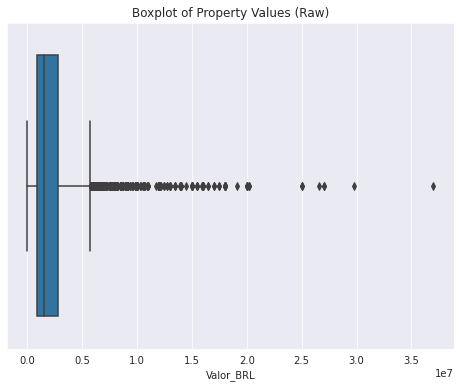

In [32]:
# Boxplot of Property Values
plt.figure(figsize=(8,6))
sns.boxplot(x='Valor_BRL', data=sale_properties).set(title = 'Boxplot of Property Values (Raw)')
plt.show()

Lower Limit: -2130000.0
Upper Limit: 5790000.0


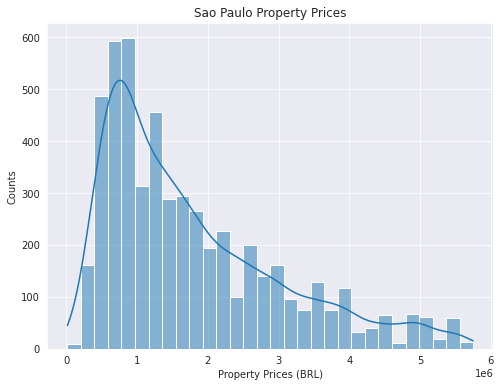

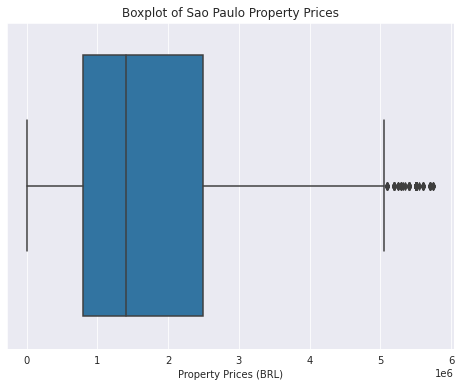

In [33]:
# Apply continuous outlier removal function to the column 'Valor_BRL'
sale_properties = continuous_iqr_range_outlier_removal(sale_properties, 'Valor_BRL')

# Histogram of Property Areas
plt.figure(figsize=(8,6))
sns.set_style('darkgrid')
sns.histplot(x='Valor_BRL', data=sale_properties, kde=True).set(title = 'Sao Paulo Property Prices', xlabel='Property Prices (BRL)', ylabel='Counts')
plt.show()

# Boxplot of Property Areas
plt.figure(figsize=(8,6))
sns.boxplot(x='Valor_BRL', data=sale_properties).set(title = 'Boxplot of Sao Paulo Property Prices', xlabel='Property Prices (BRL)')
plt.show()

In [34]:
# Check validated data shape and types
sale_properties.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5347 entries, 1 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Rua        5347 non-null   object 
 1   Bairro     5347 non-null   object 
 2   Cidade     5347 non-null   object 
 3   Metragem   5347 non-null   int64  
 4   Quartos    5347 non-null   int64  
 5   Banheiros  5347 non-null   int64  
 6   Vagas      5347 non-null   int64  
 7   Valor_BRL  5347 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 376.0+ KB


In [35]:
# Save validated dataset to csv
sale_properties.to_csv('datasets/sp_sale_properties.csv')